In [1]:
import timeit
import psutil
import sys
import os
import matplotlib.pyplot as plt

from multiprocessing import cpu_count
from concurrent.futures import ProcessPoolExecutor as Pool

In [2]:
def measure_runtime_and_memory(func, params, array):
    memory_before = psutil.virtual_memory()[3] / 1024 # in KB
    start_time = timeit.default_timer()
    func(array, **params)
    end_time = timeit.default_timer()
    memory_after = psutil.virtual_memory()[3] / 1024
    memory_usage = memory_after - memory_before
    runtime = end_time - start_time
    return runtime, memory_usage

In [3]:
def run_tests_float(sort_functions, funcs_params, input_sizes, input_range,
                    executor=Pool):
    data = {label: [] for _, label in sort_functions}
    with executor(max_workers=cpu_count()) as pool:
        for sort_func, label in sort_functions:
            for size in input_sizes:
                array = random_1_dim_array(
                    elts_range=input_range, size_of_1_dim_range=size)
                data[label].append(pool.submit(
                    measure_runtime_and_memory, sort_func,
                    funcs_params[label],
                    array))
        for sort_func, label in sort_functions:
            for i in range(len(data[label])):
                data[label][i] = data[label][i].result()
    return data

In [4]:
def plot_results(data_to_plot):
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax2 = ax1.twinx()

    for label in data_to_plot:
        ax1.plot([i[0] for i in input_sizes], [sum([runtime for runtime, memory in i])/len([runtime for runtime, memory in i]) \
                                           for i in data_to_plot[label]], marker='o', label=f'{label} (Runtime)')
        ax2.plot([i[0] for i in input_sizes], [sum([memory for runtime, memory in i])/len([memory for runtime, memory in i]) \
                                           for i in data_to_plot[label]], marker='x', label=f'{label} (Memory)')

    ax1.set_xlabel('Input Size')
    ax1.set_ylabel('Runtime (seconds)')
    ax2.set_ylabel('Memory (KB)')
    ax1.set_xscale('log')
    ax2.set_xscale('log')
    fig.legend(loc='upper right')
    plt.grid(True)
    plt.title('Sorting Algorithms Runtimes and Memory Consumption')
    plt.show()

In [5]:
os.chdir('../../../')
sys.path.append(os.getcwd())
from Algorithms.python_solutions.merge_sort import merge_sort, merge_sort_parallel
from Algorithms.python_solutions.tests.test_sorts_and_searches import random_1_dim_array

In [6]:
input_sizes = [(10000, 10000), (50000, 50000), (100000, 100000), (500000, 500000),
               (1000000, 1000000)]

sorting_algorithms = [
    (merge_sort, 'Merge Sort 3'),
    (merge_sort, 'Merge Sort 5'),
    (merge_sort, 'Merge Sort 10'),
    (merge_sort, 'Merge Sort'),
]

funcs_params = {
    'Merge Sort 3': {'batch_size': 3},
    'Merge Sort 5': {'batch_size': 5},
    'Merge Sort 10': {'batch_size': 10},
    'Merge Sort': {}
}

input_range = (-100, 100)

In [24]:
full_data = []
for _ in range(10):
    one_test_data = run_tests_float(sorting_algorithms, funcs_params, input_sizes, input_range)
    full_data.append(one_test_data)

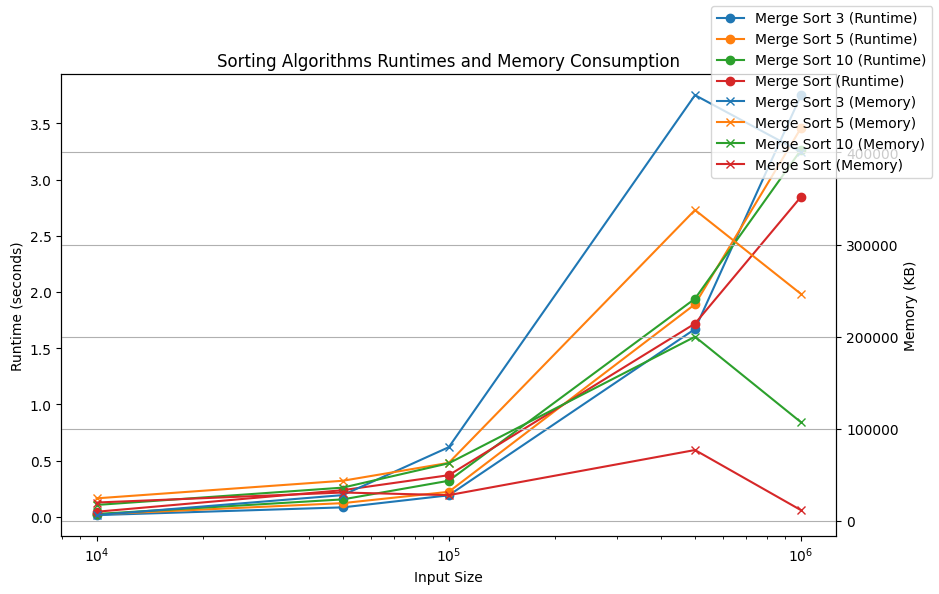

In [25]:
data_to_plot = {label: [[full_data[i][label][j] for i in range(10)] for j in range(len(input_sizes))] for _, label in sorting_algorithms}
plot_results(data_to_plot)

In [7]:
input_sizes = [(10000, 10000), (50000, 50000), (100000, 100000), (500000, 500000), (1000000, 1000000),
               (10000000, 10000000)]

sorting_algorithms = [
    (merge_sort_parallel, 'Merge Sort Parallel 500'),
    (merge_sort_parallel, 'Merge Sort Parallel 1000'),
    (merge_sort_parallel, 'Merge Sort Parallel 5000')
]

funcs_params = {
    'Merge Sort Parallel 500': {'batch_size': 500},
    'Merge Sort Parallel 1000': {'batch_size': 1000},
    'Merge Sort Parallel 5000': {'batch_size': 5000}
}

In [8]:
full_data = []
for _ in range(10):
    one_test_data = run_tests_float(sorting_algorithms, funcs_params, input_sizes, input_range)
    full_data.append(one_test_data)

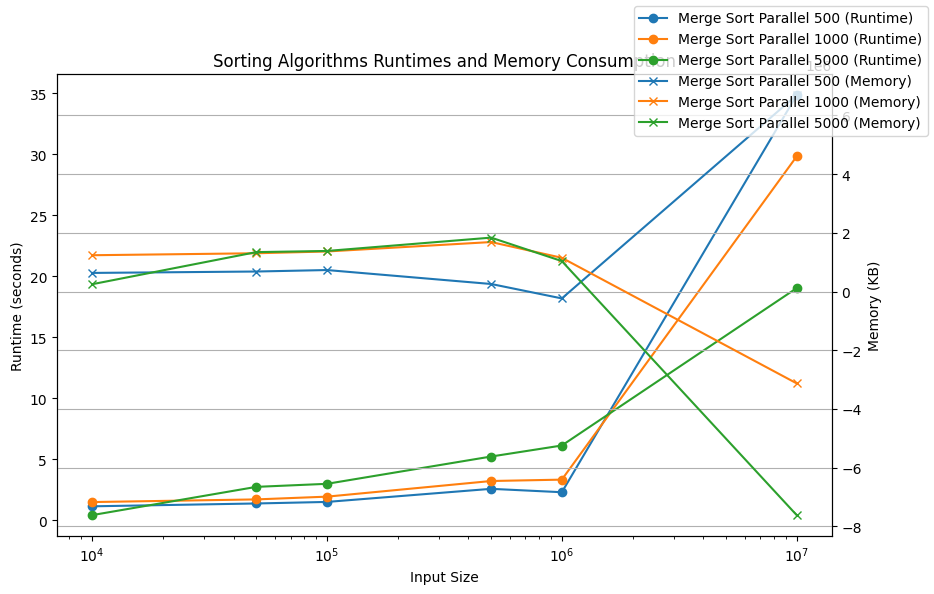

In [9]:
data_to_plot = {label: [[full_data[i][label][j] for i in range(10)] for j in range(len(input_sizes))] for _, label in sorting_algorithms}
plot_results(data_to_plot)

In [10]:
sorting_algorithms = [
    (merge_sort, 'Merge Sort'),
    (merge_sort_parallel, 'Merge Sort Parallel')
]

funcs_params = {
    'Merge Sort': {},
    'Merge Sort Parallel': {}
}

In [11]:
full_data = []
for _ in range(10):
    one_test_data = run_tests_float(sorting_algorithms, funcs_params, input_sizes, input_range)
    full_data.append(one_test_data)

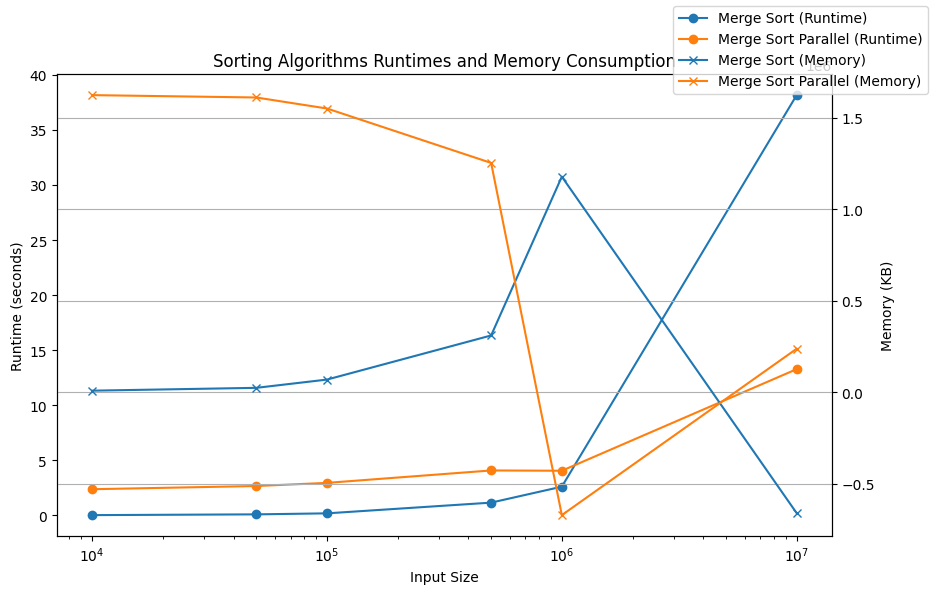

In [12]:
data_to_plot = {label: [[full_data[i][label][j] for i in range(10)] for j in range(len(input_sizes))] for _, label in sorting_algorithms}
plot_results(data_to_plot)

We can see the effect of batch size changing: for the usual merge sort switching to insertion sort earlier gives a slight boost, and for the parallel option there is an increase in performance when switching to the usual merge sort (and probably even to the insertion sort) at the batches about a couple of hundreds less than array's size.